# Excercise Chapter 2, Book Aurelien Geron

In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=2)

In [2]:
df = pd.read_csv('housing.csv')
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [3]:
df.tail(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


*total_bedrooms* hat 20.433 Werte, dh einige Werte fehlen.

Das Merkmal *ocean_proximity* ist vom Typ `Object` und es kann beliebige Python-Objekt enthalten. Wir wissen aber, dass es sich hier um den Datentyp `String` handelt. Und die Werte des Merkmals *ocean_proximity* wiederholen sich, es handelt sich um kategorische Daten. 

Um herauszufinden, wie viele Kategorien bei *ocean_proximity* es gibt, benutzen wir die Methode `value_counts()`

In [5]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
df.describe() # fasst numerische Merkmale zusammen

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


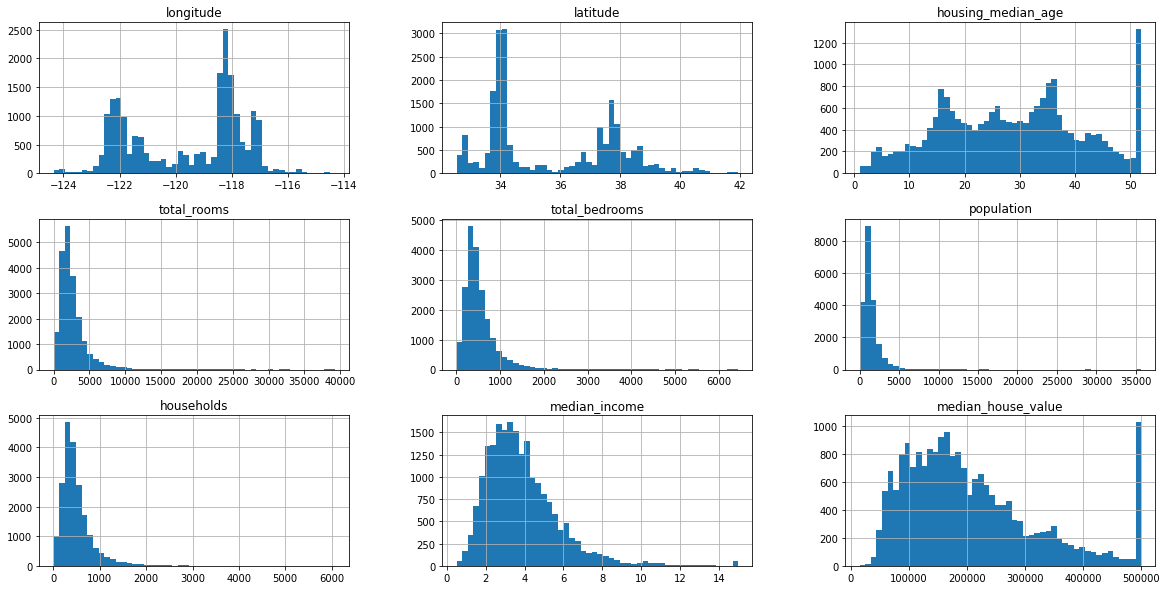

In [7]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20, 10));

In [8]:
df["income_cat"] = pd.cut(df.median_income, bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1,2,3,4,5])

```python
df.income_cat = pd.cut(df.median_income, bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1,2,3,4,5])
```
<ipython-input-9-7f43d7c5fbfd>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.income_cat = pd.cut(df.median_income, bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1,2,3,4,5])

In [9]:
df.income_cat

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

Nun koennen wir eine stratifizierte Stichprobe anahnd der Einkommenskategorie ziehen.

In [10]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

In [12]:
split = StratifiedShuffleSplit(n_splits=1,
                               test_size=0.2,
                               random_state=42)

In [13]:
split

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)

In [14]:
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set  = df.loc[test_index]

In [15]:
type(df.income_cat)

pandas.core.series.Series

In [16]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


### Drop a Feature
#### Das Merkmal `income_cat` kann entfernt werden.

In [17]:
for set_ in(strat_train_set, strat_test_set):
    set_.drop("income_cat",axis=1, inplace=True)

## Exploratory Data Analysis (EDA) 
### Create a copy of the dataset

In [18]:
# nehmen wir eine Kopie des Trainingdatensatzes
housing = strat_test_set.copy()

In [19]:
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN


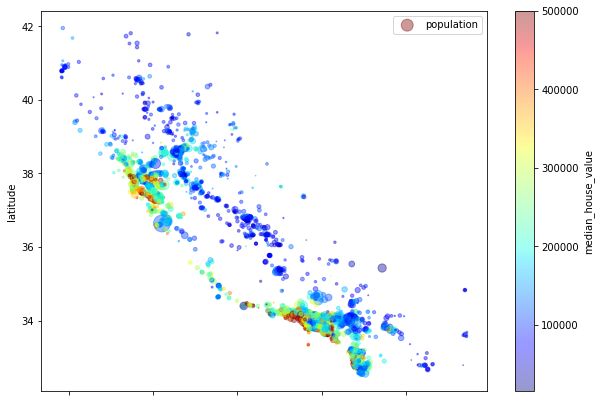

In [20]:
housing.plot(
              kind='scatter'
             ,x='longitude'
             ,y='latitude'
             ,alpha=0.4
             ,s=housing["population"]/100  #size of the dots correlates to population, bigger circles more population
             ,label='population' # the label is needed for the legend
             ,c='median_house_value' # color gives the house price,  the argument has to be a column
             ,cmap=plt.get_cmap('jet')
             ,figsize=(10,7)
             ,colorbar=True
            ) 
plt.legend();

## Pearson Correlation
Die Methode `corr()`, berechnet die lineare Korrelation. Der Korrelationskoeffizient liegt zwischen -1 und 1. Liegt der Wert bei 1 haben wir eine starke positive Korrelation; bei -1 liegt eine stark negative korrelation; 0 bedeutet, dass es gar keine lineare Korrelation vorliegt. 

Schauen, wie stark jedes Merkmal mit dem mittleren Immobilienwert korriliert:

In [21]:
corr_matrix=housing.corr() 
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691831
total_rooms           0.131435
housing_median_age    0.071357
households            0.071242
total_bedrooms        0.057568
population           -0.016033
longitude            -0.039987
latitude             -0.150124
Name: median_house_value, dtype: float64

## Feature Engineering: Experimentieren mit Kombinationen von Merkmalen
p-63 |
- bedrooms/household
- populaton/household
etc...

## Aufbereiten der Daten 
viele ML Algorithmen koennen nicht mit fehlenden Daten umgehen. Das Attribut `total_bedrooms` hat fehlende Werte. Um diesen Umstand zu beheben, haben wir drei Möglichkeiten
1. die entsprechenden Bezirke entfernen.
2. das Merkmal komplett verwerfen.
3. die Werte auf einen bestimmten Wert setzen (NULL, Median o.Ä.)

Alle drei leicht umzusetzen:

```python
housing.dropna(subset=["total_bedrooms"]) #option 1
housing.drop("total_bedrooms",axis=1)     #option 2

median=housing["total_bedrooms"].median()  #option 3
housing["total_bedrooms"].fillna(median, inplace=True)


## Sklearn Klasse `SimpleImputer`
Umgang mit fehlenden Werten mit sklearn Klassen

In [22]:
from sklearn.impute import SimpleImputer

# eine Instanz von SimpleImputer erzeugen 
# und die Strategie Median waehlen
imputer = SimpleImputer(strategy="median") 

# Median kann nur von numerischen Werten erzeugt werden
# deshalb eine kopie unter ausschluss von Textmerkmal `ocean_proximity` erzeugen

housing_num = housing.drop('ocean_proximity', axis=1)

In [23]:
# die imputer-Instanz durch Aufrufen der Methode fit() an die Trainingsdaten anpassen
imputer.fit(housing_num)

SimpleImputer(strategy='median')

Der **imputer** rechnet den Median fuer jede Spalte. Das Ergebnis ist im Attribut `statistics_` gespeichert.

In [24]:
imputer.statistics_

array([-1.18e+02,  3.42e+01,  2.80e+01,  2.16e+03,  4.41e+02,  1.17e+03,
        4.16e+02,  3.51e+00,  1.81e+05])

Ich kann nun mit diesem "trainierten" `Imputer` den Trainingsdatensatz transformieren, sodass die fehlenden werte durch Mediane ersetzt werden koennen.